In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
df = pd.DataFrame()
df['review'] = np.random.randint(1 , 6  , size = 1000)
df['price'] = np.random.randint(2 , 9 , size = 1000) / 2
df['type'] = 'type1'
df['type'].iloc[:666] = 'type2'
df['type'].iloc[500:] = 'type3'
df['type'].iloc[:100] = 'type1'
df['year'] = np.random.randint(2019 , 2021 , size = 1000)
df['month'] = np.random.randint(1 , 13 , size = 1000)

#altering so combo chart works
df2 = df.copy()
df2['month'] = df2['month'] - 1 

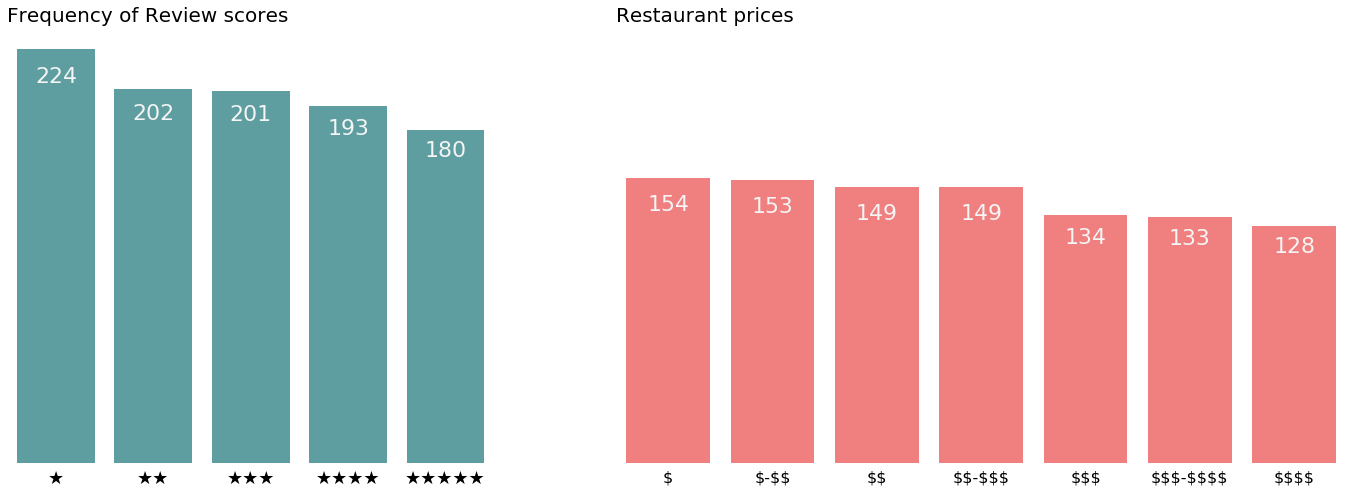

In [355]:
#FREQUENCY PLOTS

fig , (ax , ax2) = plt.subplots(1 , 2 , figsize = (24, 8) , sharey = True , gridspec_kw={'width_ratios' : [1 , 1.5]})

#First plot

ax = sns.barplot(x = ["★","★★","★★★","★★★★","★★★★★"] , y = df['review'].value_counts() , data =df , color = 'cadetblue' , saturation = 1 , ax = ax)

ax.set_title('Frequency of Review scores' , loc = 'left' , fontsize = 20)

ax.set_xticklabels(["★","★★","★★★","★★★★","★★★★★"] , fontsize = 18)

ax.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False) #Removes ticks

ax.get_yaxis().set_visible(False)

#Adding data values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/1.1, '%d' % int(p.get_height()), 
            fontsize=22, ha='center', va='bottom' , color = 'whitesmoke')

#Second plot

ax2 = sns.barplot(x = ['$' , '$-$$' , '\$$', '$$-$$$' , '$$$' , '$$$-$$$$' , '\$$$$'] , y = df['price'].value_counts() , data = df , color = 'lightcoral' , saturation = 1 , ax = ax2)

ax2.set_title('Restaurant prices' , loc = 'left' , fontsize = 20)

ax2.set_xticklabels(['$' , '$-$$' , '\$$', '$$-$$$' , '$$$' , '$$$-$$$$' , '\$$$$'] , fontsize = 16)

ax2.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False) #Removes ticks

ax2.get_yaxis().set_visible(False)

for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height()/1.15, '%d' % int(p.get_height()), 
            fontsize=22, ha='center', va='bottom' , color = 'whitesmoke')


sns.despine(left = True , bottom = True) #Removes border

plt.savefig('freq_plot.png')

In [285]:
#Constructing compatable data for bubble plot
test = df.groupby('type').agg(count=('review' , 'size') , review_mean = ('review' , 'mean') , price_mean = ('price' , 'mean'))


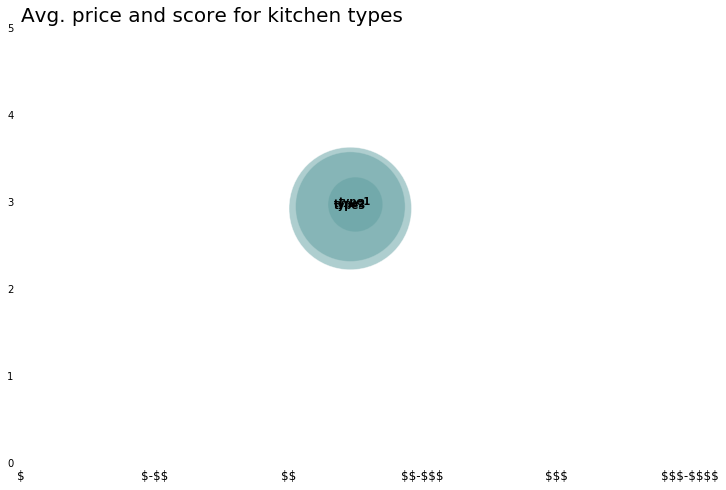

In [356]:
#BUBBLE SCHART

fig , ax = plt.subplots(1 , figsize = (12, 8))

ax = sns.scatterplot(x = test['price_mean'] , y = test['review_mean'] , s = test['count'] * 30 , data = test , alpha = 0.5 , color = 'cadetblue' , ax = ax)

ax.set_title('Avg. price and score for kitchen types' , loc = 'left' , fontsize = 20)
ax.set_xlim(0 , 5)
ax.set_ylim(0 , 5)

ax.set_xticklabels(['$' , '$-$$' , '\$$', '$$-$$$' , '$$$' , '$$$-$$$$' , '\$$$$'] , fontsize = 12)

ax.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False) #Removes ticks

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

sns.despine(left = True , bottom = True) #Removes border

#Adding data labels
for line in range(0,test.shape[0]):
     ax.text(test['price_mean'][line], test['review_mean'][line], test.index[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.savefig('Bubble-plot.png')

In [449]:
df2['month'].groupby(by = df2['review']).mean()
#df['price'].groupby(by = df['price']).mean()

review
1    5.878049
2    5.334928
3    5.270000
4    5.472826
5    5.247525
Name: month, dtype: float64

In [444]:
teest = pd.value_counts(df['month'].values , sort = False)
teest

1      77
2     101
3      88
4      71
5      76
6      94
7      90
8      71
9      91
10     84
11     71
12     86
dtype: int64

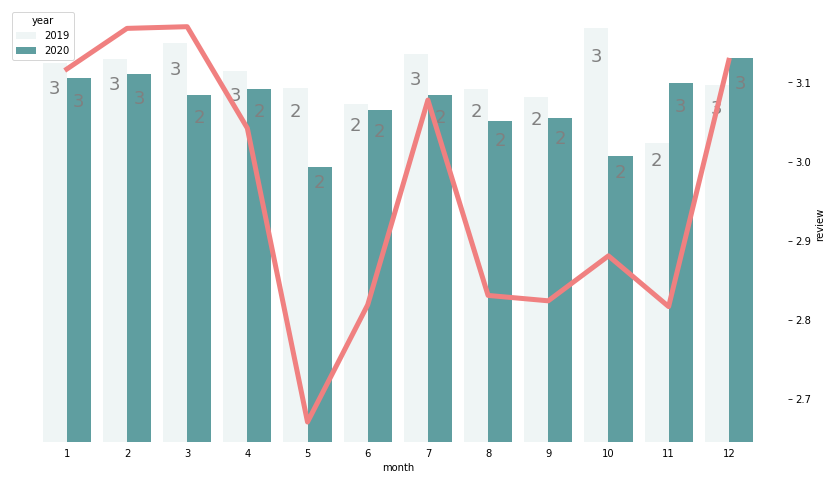

In [452]:
#Combo-chart

fig , ax = plt.subplots(1 , figsize = (14, 8))


#Bar chart
ax = sns.barplot(x = 'month' , y = 'review' , data = df , hue = 'year' , color = 'cadetblue' , saturation = 1 , ax = ax , ci = None)

ax.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False) #Removes ticks
#ax.set_xlim(1, 12)

ax.get_yaxis().set_visible(False)

#Data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/1.1, '%d' % int(p.get_height()), 
            fontsize=18, ha='center', va='bottom' , color = 'grey')

#Adding secondary axis
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'month' , y = 'review' , data = df2 , color = 'lightcoral' , linewidth = 5, ax = ax2 , ci = None)
#ax2.get_yaxis().set_visible(False)

sns.despine(left = True , bottom = True , right = True) #Removes border

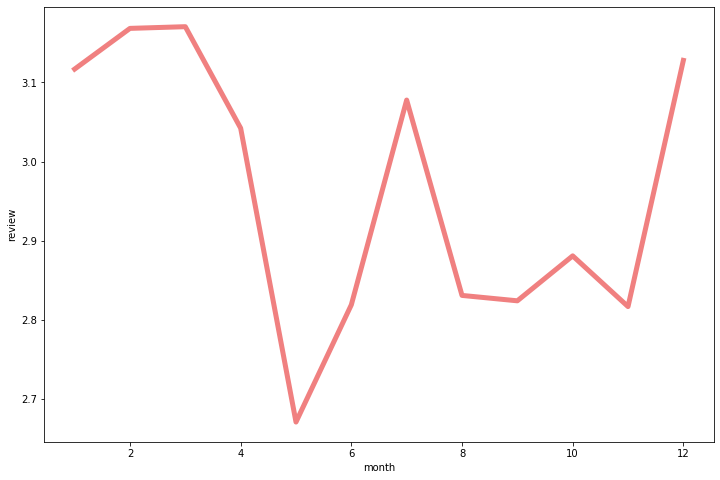

In [451]:
fig , ax = plt.subplots(1 , figsize = (12 , 8))
ax = sns.lineplot(x = 'month' , y = 'review' , data = df , color = 'lightcoral' , linewidth = 5 , ci = None)


In [22]:
import geopandas as gpd

#Henter geo-info om de danske Postnumre
url = "https://raw.githubusercontent.com/ok-dk/dagi/master/geojson/postnumre.geojson"
postnr = gpd.read_file(url)
#Set to meter based system
postnr.to_crs(epsg = '25832', inplace = True)
postnr.columns = postnr.columns.str.lower()
postnr.rename(columns = {'postnr_txt':'postnr'}, inplace = True)
 
# Information for Postnr
postnr_temp = pd.read_json('https://dawa.aws.dk/postnumre')
postnr_loop = []
# kommune-info er i en kolonnen, hvor hver obs er en liste af dicts - vil have kominfo ud
for idx, row in postnr_temp.iterrows():
    for dct in row['kommuner']:
        dct['postnr'] = row['nr']
        dct['post_navn'] = row['navn']
        postnr_loop.append(dct)
 
post_info = pd.DataFrame(postnr_loop).loc[:,['postnr','post_navn','kode']].rename(columns = {'kode':'komkode'})
post_info['postnr']=post_info['postnr'].astype(str)
 
# information for Kommuner
kommune_info = pd.read_json('https://dawa.aws.dk/kommuner')\
                .pipe(lambda df: \
                        df.assign(komkode=df.kode.astype(str).str.zfill(4)))\
                .loc[:,['komkode', 'navn', 'regionskode']]\
                .rename(columns = {'navn':'kommune'})
 
kommune_info['regionskode'] = kommune_info['regionskode'].astype(str)
               
 
# Information for Regioner
region_info = pd.read_json('https://dawa.aws.dk/regioner/')\
                .loc[:,['kode','navn']]\
                .add_prefix('regions')
region_info['regionskode'] = region_info['regionskode'].astype(str)
region_info.rename(columns = {'regionsnavn':'region'}, inplace = True)
 
#Gather in df with geo-coordinates:
postnr = postnr.merge(post_info, how='left')
 
#Manuel erstatning af kommunekoder - I kbh var nogle af postnumrene slået sammen
# således af kbhk var 1000-1499, hvilket DAWA data derfor ikke kunne merge kommunekoder på.
postnr['komkode'] = np.where(postnr.postbynavn == 'København K','0101',postnr.komkode)
postnr['komkode'] = np.where(postnr.postbynavn == 'København V','0101',postnr.komkode)
postnr['komkode'] = np.where(postnr.postbynavn == 'Frederiksberg C','0147',postnr.komkode)
 
#Merger kommune og regionsdata
postnr = postnr.merge(kommune_info,how='left')\
                .merge(region_info,how='left')
 
postnr.head()

,postnr,postbynavn,geometry,post_navn,komkode,kommune,regionskode,region
0,2800,Kongens Lyngby,"POLYGON Z ((719643.650 6189471.570 -999.000, 7...",Kongens Lyngby,0157,Gentofte,1084,Region Hovedstaden
1,2800,Kongens Lyngby,"POLYGON Z ((719643.650 6189471.570 -999.000, 7...",Kongens Lyngby,0159,Gladsaxe,1084,Region Hovedstaden
2,2800,Kongens Lyngby,"POLYGON Z ((719643.650 6189471.570 -999.000, 7...",Kongens Lyngby,0173,Lyngby-Taarbæk,1084,Region Hovedstaden
3,2800,Kongens Lyngby,"POLYGON Z ((719643.650 6189471.570 -999.000, 7...",Kongens Lyngby,0230,Rudersdal,1084,Region Hovedstaden
4,6310,Broager,"POLYGON Z ((545236.100 6084078.000 -999.000, 5...",Broager,0540,Sønderborg,1083,Region Syddanmark


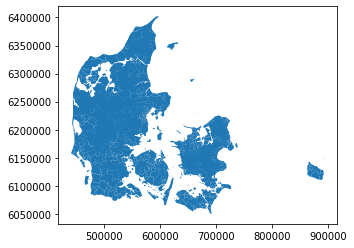

In [24]:
postnr.plot()